# Task Description

- Write a function which will take as an input audio signal, frame length (may be in duration, in that case also sampling rate should be given in input), step size and window function and will return the audio spectrogram matrix,
- Then write another function which will plot the spectrogram using colour map of a given theme.
Plot spectrograms of armenian vowels prounounced by you (you can use the code below)
- Generate DTMF signal of your phone number using DTMF_Table.png (each digit and pause should be 0.5 seconds)
- Get a spectrogram of 3)

In [3]:
import scipy.io.wavfile as wavfile
import os
from scipy import signal
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import glob


input_dir = 'vowel-sounds'
file_paths = glob.glob(os.path.join(input_dir, "*.wav"))
short_time = 32 #miliseconds
start_t = 0 # start time in seconds
dur = 7 # duration in seconds
color_theme = 'hot' # inferno, gnuplot2, jet, jet_r, Greys_r, terrain, plasma, gist_gray, gist_gray_r, spectral, bone_r, hot
dpi_value = 96 # dots per inch
size_pixel_y = 1301
size_pixel_x = 710

# ---------------------------------------------------------------------------------
def get_spcgr(audio_path, cmapval, start=0, duration=5, epsilon=1e-3):
	'''
	Here we use scipy.signal.spectrogram, can be useful to check the manual implementation of spectrogram,
	it also saves the spectogram as a picture
	'''
	# extracts audio data, then saves spectrogram of duration sec
	fs, mix_data = wavfile.read(audio_path)
	audio_dir = os.path.dirname(audio_path)
	audio_name = os.path.basename(audio_path).split('.') [0]
	frlen = int(short_time * fs / 1000) # frame length with duration short_time ms
	ovlap = int(frlen / 2) # overlap of adjacent frames
	f, t, Sxx = signal.spectrogram(mix_data[start*fs:(start+duration)*fs], fs=fs, window='hamming', nperseg=frlen, noverlap=ovlap)
	fig = plt.figure()
	fig.canvas.set_window_title(audio_name)
	#plt.pcolormesh(t, f, Sxx, cmap=cmapval, norm=colors.PowerNorm(gamma=1./3.), edgecolors='None', shading='gouraud') # cmap = 'inferno', 'bwr', 'binary', 'Greys', 'OrRd', 'jet', 'Blues', 'afmhot', 'RdYlBu', 'PuBu', 'PuBu_r'
	plt.pcolormesh(t, f, Sxx, cmap=cmapval, norm=colors.LogNorm(vmin=epsilon, vmax=Sxx.max()), edgecolors='None', shading='gouraud')
	plt.ylabel('Frequency [Hz]')
	plt.xlabel('Time [sec]')
	fig.set_size_inches(size_pixel_y / dpi_value, size_pixel_x / dpi_value)
	fig.savefig(os.path.join(audio_dir, audio_name + '.png'), dpi = dpi_value)
	plt.close()
	# plt.show()
	return None

i = 0
for path in file_paths:
	get_spcgr(path, color_theme, start_t, dur)
	print('spectrogram of \"{}\"saved'.format(os.path.basename(path)))
plt.show()


/var/folders/76/dsd9pxzn5ds7rnrw552whqfh0000gn/T/ipykernel_67979/197598098.py:33: MatplotlibDeprecationWarning: 
The set_window_title function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use manager.set_window_title or GUI-specific methods instead.
  fig.canvas.set_window_title(audio_name)


spectrogram of "i.wav"saved
spectrogram of "vo.wav"saved
spectrogram of "o.wav"saved
spectrogram of "ye.wav"saved
spectrogram of "a.wav"saved
spectrogram of "u.wav"saved
spectrogram of "e.wav"saved
spectrogram of "@.wav"saved


['vo.png', 'i.png', 'ye.png', 'o.png', '@.png', 'u.png', 'a.png', 'e.png']


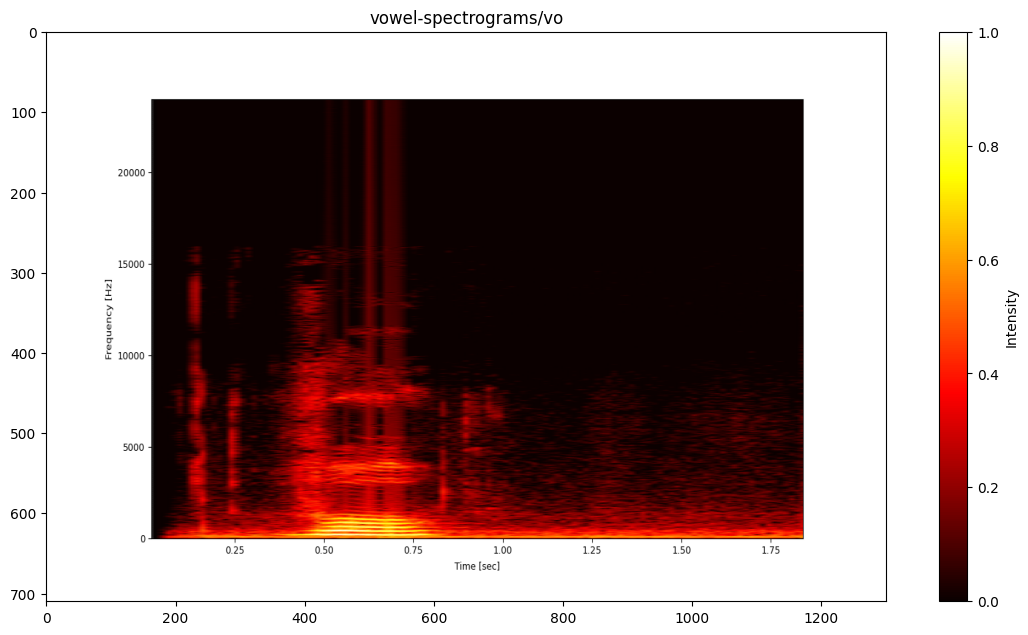

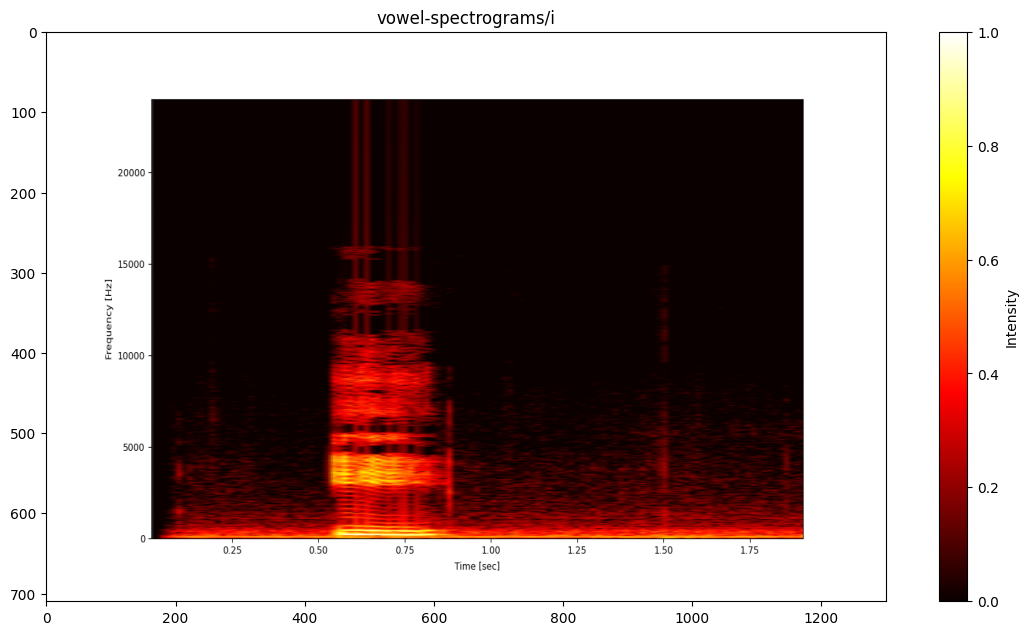

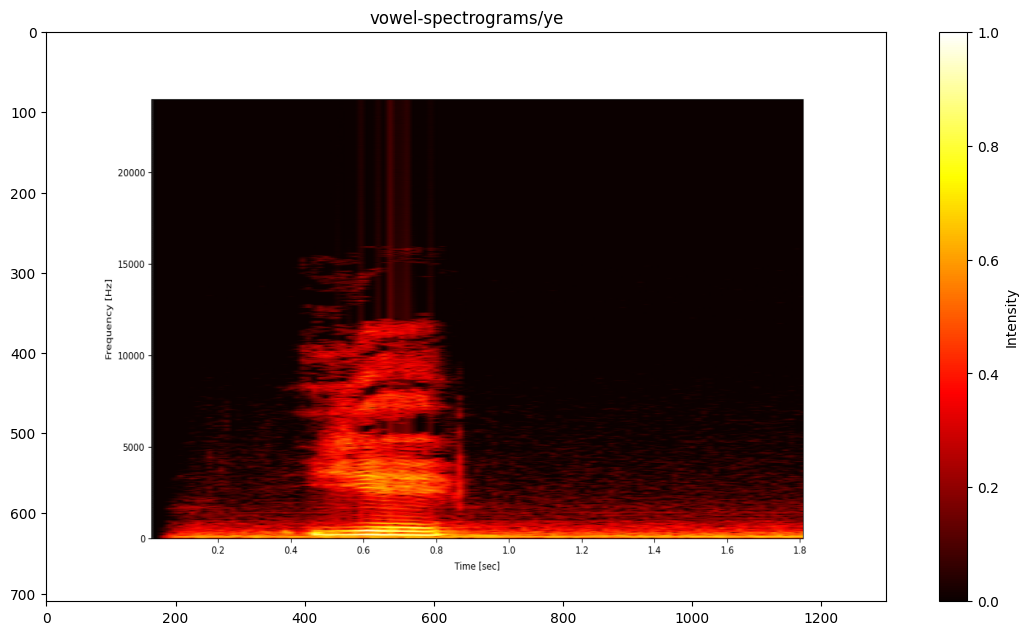

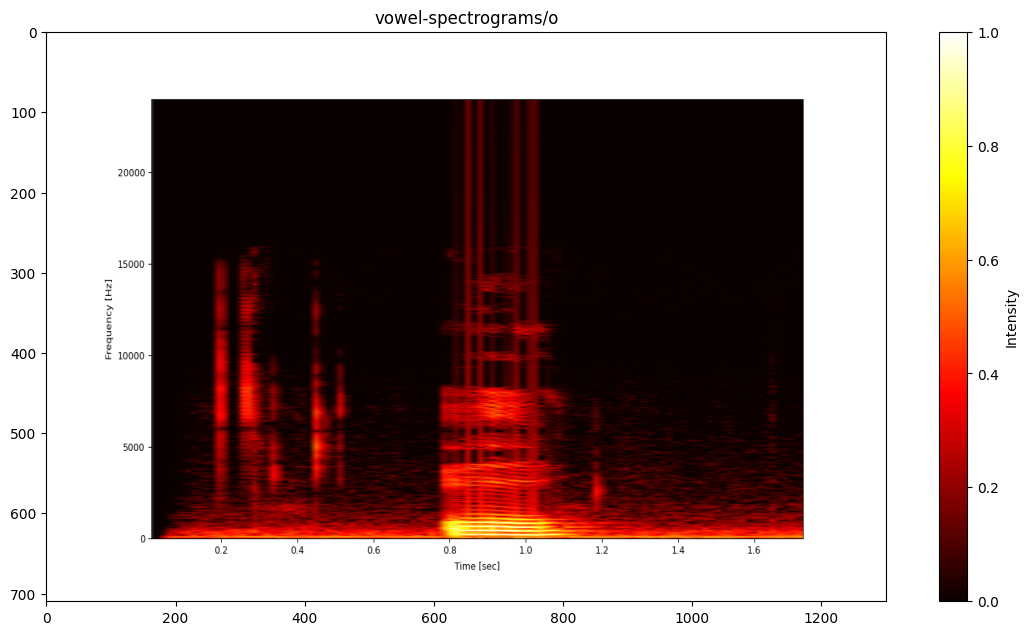

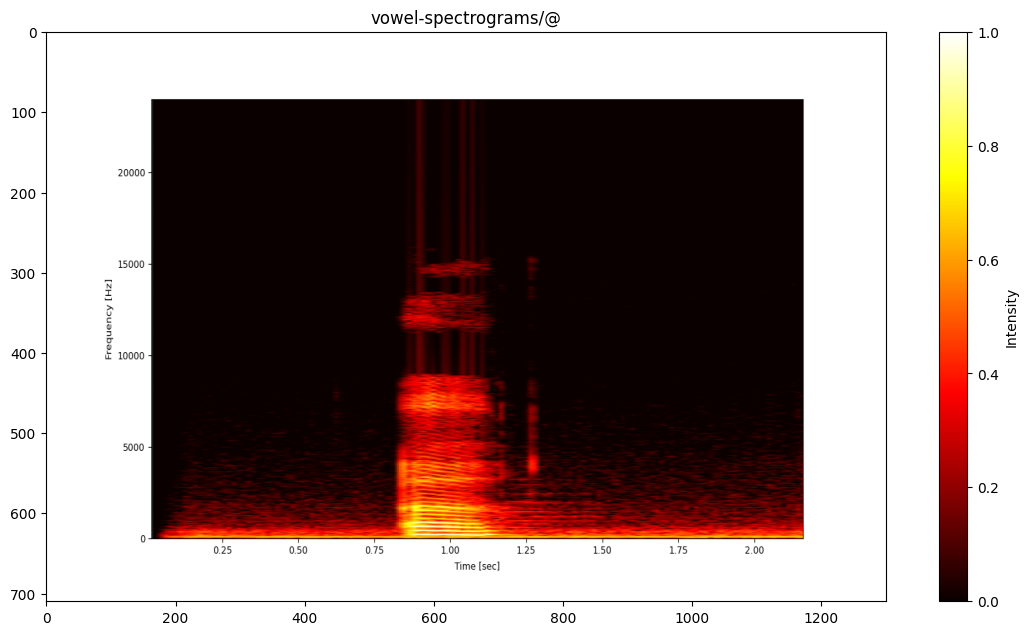

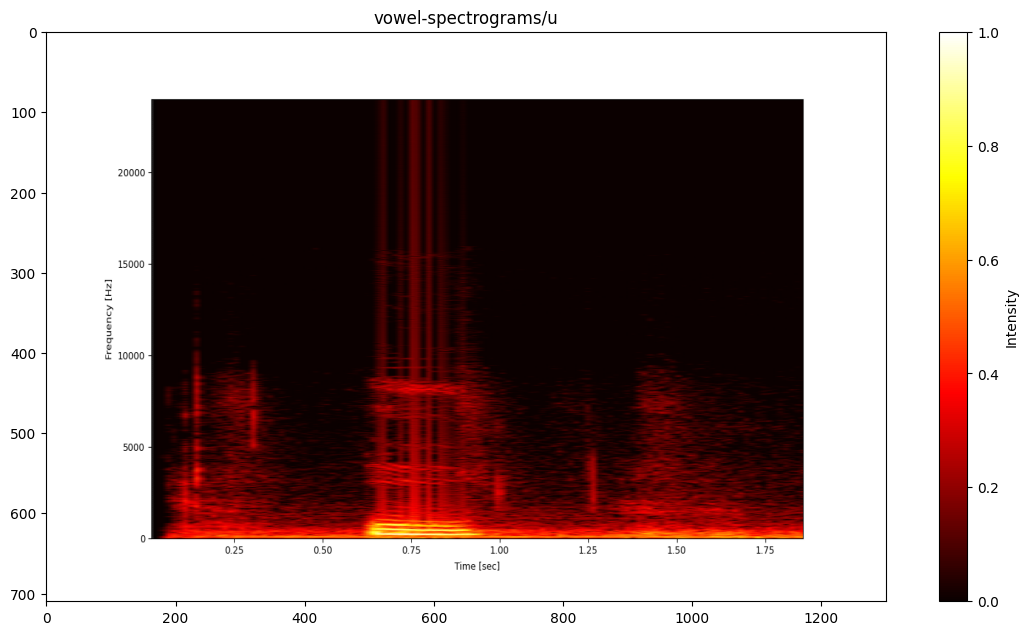

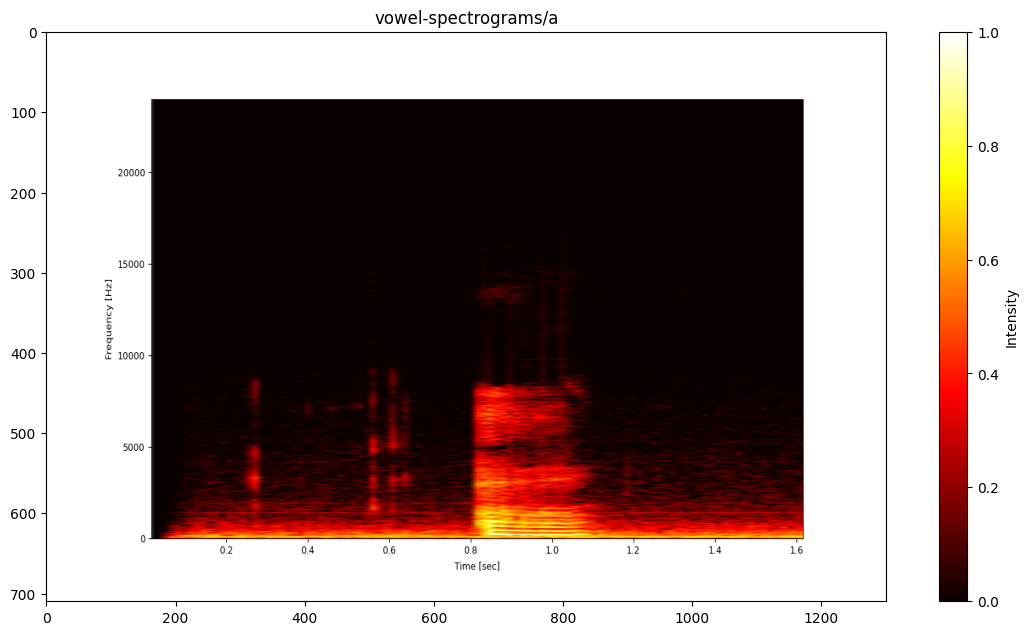

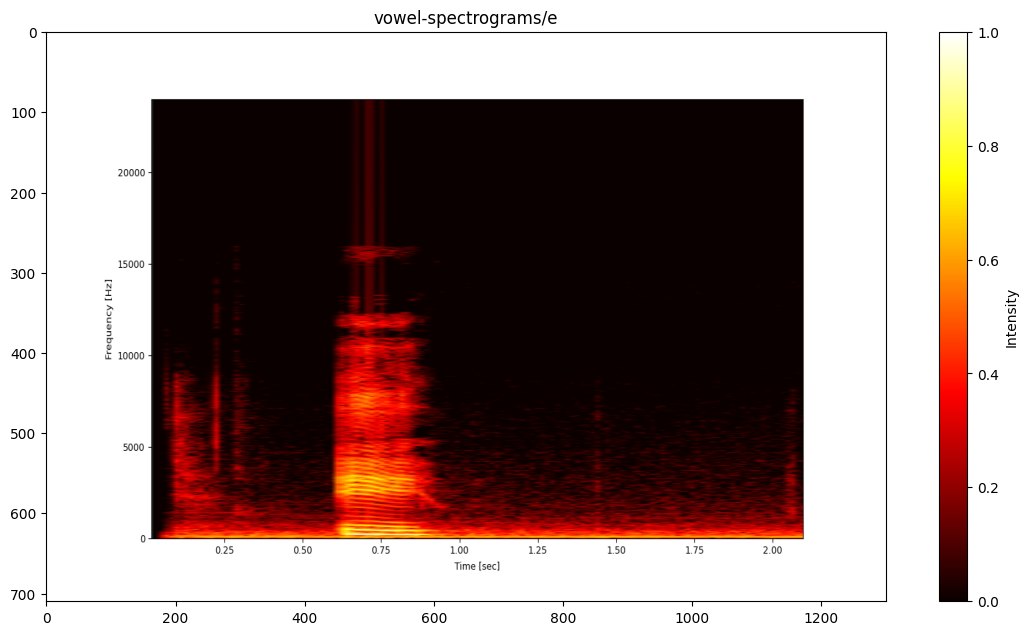

In [19]:
import matplotlib.pyplot as plt
import os
from matplotlib.image import imread

def display_spectrogram_png(path, folder_path, color_theme, dpi_value, size_pixel_y, size_pixel_x):
    """
    Display spectrogram PNG images from the given folder using a color theme.

    :param folder_path: Path containing the spectrogram PNG image.
    :param color_theme: Color map theme for the plot.
    :param dpi_value: Dots per inch for the plot resolution.
    :param size_pixel_y: Pixel size in y-dimension.
    :param size_pixel_x: Pixel size in x-dimension.
    """
    path = os.path.join(folder_path, path)
    # Read the image
    image = imread(path)
        
    # Display the image with the spectrogram colormap theme
    plt.figure()
    plt.imshow(image, cmap=color_theme, aspect='auto')
    plt.colorbar(label='Intensity')
    plt.title(path.split('.')[0])
        
    plt.gcf().set_size_inches(size_pixel_y / dpi_value, size_pixel_x / dpi_value)
    plt.show()

# Usage
vowel_spectrogram_folder = 'vowel-spectrograms'
# List all PNG files in the folder
files = [f for f in os.listdir(vowel_spectrogram_folder) if f.endswith('.png')]
print(files)
for path in files:
	display_spectrogram_png(path, vowel_spectrogram_folder, color_theme='hot', dpi_value=96, size_pixel_y=1301, size_pixel_x=710)

In [20]:
import numpy as np
import scipy.io.wavfile as wavfile

# Define the DTMF frequencies for each digit according to the standard DTMF keypad
DTMF_FREQUENCIES = {
    '1': (697, 1209),
    '2': (697, 1336),
    '3': (697, 1477),
    'A': (697, 1633),
    '4': (770, 1209),
    '5': (770, 1336),
    '6': (770, 1477),
    'B': (770, 1633),
    '7': (852, 1209),
    '8': (852, 1336),
    '9': (852, 1477),
    'C': (852, 1633),
    '*': (941, 1209),
    '0': (941, 1336),
    '#': (941, 1477),
    'D': (941, 1633)
}

def generate_dtmf_tone(digit, duration, sample_rate):
    """
    Generate a DTMF tone for a given digit.

    :param digit: The digit to generate the tone for.
    :param duration: Duration of the tone in seconds.
    :param sample_rate: The sample rate in Hz.
    :return: The generated DTMF tone.
    """
    if digit not in DTMF_FREQUENCIES:
        raise ValueError("Invalid DTMF digit")

    low_freq, high_freq = DTMF_FREQUENCIES[digit]
    t = np.linspace(0, duration, int(sample_rate * duration), endpoint=False)
    tone = np.sin(2 * np.pi * low_freq * t) + np.sin(2 * np.pi * high_freq * t)
    return tone

# Generate DTMF tones for the provided phone number
phone_number = '077898752'  # Replace with the desired phone number
duration = 0.5  # Duration of each digit and pause in seconds
sample_rate = 44100  # Sample rate in Hz

# Generate the DTMF signal for each digit in the phone number
dtmf_signal = np.array([])
for digit in phone_number:
    tone = generate_dtmf_tone(digit, duration, sample_rate)
    pause = np.zeros(int(sample_rate * duration))  # Pause between tones
    dtmf_signal = np.concatenate((dtmf_signal, tone, pause))

# Normalize the signal to the 16-bit range and convert to integer
dtmf_signal = np.int16(dtmf_signal / np.max(np.abs(dtmf_signal)) * 32767)

# Save the DTMF signal to a WAV file
dtmf_wav_filename = 'dtmf_phone_number.wav'  # Replace with your desired path
wavfile.write(dtmf_wav_filename, sample_rate, dtmf_signal)


In [8]:
get_spcgr(audio_path='dtmf_phone_number.wav', cmapval='gnuplot2', start=0, duration=5)

/var/folders/76/dsd9pxzn5ds7rnrw552whqfh0000gn/T/ipykernel_67979/197598098.py:33: MatplotlibDeprecationWarning: 
The set_window_title function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use manager.set_window_title or GUI-specific methods instead.
  fig.canvas.set_window_title(audio_name)


In [22]:
display_spectrogram_png('dtmf_phone_number.png','generated_examples', color_theme='hot', dpi_value=96, size_pixel_y=1301, size_pixel_x=710)

FileNotFoundError: [Errno 2] No such file or directory: 'generated_examples/dtmf_phone_number.png'